In [13]:
from discrete_shocklets import shocklets, kernel_functions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches
from matplotlib import rcParams
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib.ticker import MultipleLocator
from matplotlib.colorbar import Colorbar
import json
import matplotlib.gridspec as gridspec
import random

In [14]:
config = {
    "mathtext.fontset":'stix',
}
rcParams.update(config)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'
font = {'family': 'serif',
        'weight': "medium"
        }

# 数据
sheet_name = 'shap_3_data'
with open("/home/liujunhui/workspace/proj/WSC/SHAP/SHAP3/"+sheet_name+".json","r") as json_file:
    data = json.load(json_file)

# 设置随机种子（可选）以确保结果可重复
random.seed(123)
# 从 data['all_token_likelihoods'][0] 随机选择 100 个索引
indices = random.sample(range(len(data['all_token_likelihoods'][0])), 100)
# 根据随机选择的索引填充 x_0 和 x_1
x_0 = [item for idx in indices for item in data['all_token_likelihoods'][0][idx]]
x_1 = [item for idx in indices for item in data['all_token_likelihoods'][1][idx]]
# x_0 = [item for sublist in data['all_token_likelihoods'][0] for item in sublist]
# x_1 = [item for sublist in data['all_token_likelihoods'][1] for item in sublist]
z=data['case_study_token_likelihoods']

y=[]
y.append(z[0][0])
y.append(z[1][0])

print(len(x_0))

2615


In [15]:
len(data['all_token_likelihoods'][0])

3202

In [16]:
print(len(x_0))
print(len(x_1))

2615
2606


In [17]:
x = []
for i in range(min(len(x_0),len(x_1))):
    x.append(x_0[i]-x_1[i])

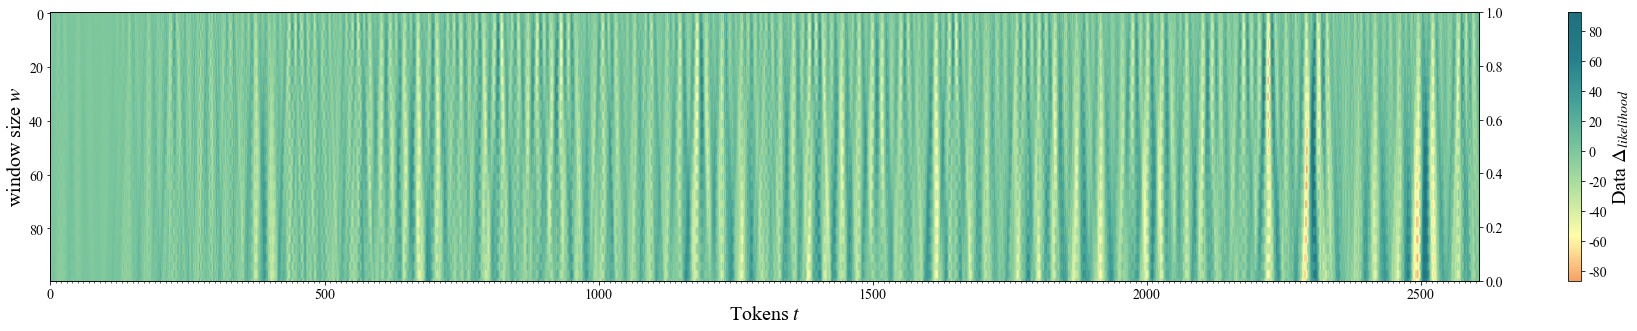

In [18]:
# windows = np.linspace(one, two, three).astype(int)
# one:越小画幅上方越容易有空白，调整到一个没有空白的参数就行
# two:热力图里的矩形高度越小，锥体的半径越大；数值越小，图2越接近原始时序数据的镜像
# three:数值越大图片看起来越顺滑，像素越好；数值不同会影响图2的垂线个数；数值越大图2越接近原始时序数据的镜像；可以直接使用默认100

# example
# windows = np.linspace(10, 1000, 100).astype(int)

# The double helix.xlsx
windows = np.linspace(15, 45, 100).astype(int)

# print(windows)

kernel = kernel_functions.power_cusp
k_args = [3.]
reflection = 2
dst, largest_kernel = shocklets.cusplet(
    x,
    windows,
    kernel_func=kernel,
    kernel_args=k_args,
    reflection=reflection
)

## 色系一
clist = ["#F7A065", "#fffea9", "#b7e3a0", "#78c49d", "#44a298","#237f8b","#1D717C"]
## 色系二
# clist = ['#053061', '#2166ac', '#4393c3', '#92c5de', '#d1e5f0', '#f7f7f7', '#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']
newcmp = LinearSegmentedColormap.from_list('chaos', clist)
## 色系三
# newcmp="RdYlGn_r"

fig= plt.figure(figsize=(32, 8*0.618))
ax1 = fig.add_subplot(111)
im = ax1.imshow(
    dst,
    aspect='auto',
    cmap=newcmp
)
ax1.set_ylabel(r'window size $w$', fontsize=20)
ax1.set_xlabel(r'Tokens $t$', fontsize=20)
# ax1.set_xticklabels([0,1500, 1600, 1700, 1800, 1900, 2000]) 
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax2 = ax1.twinx()
# ax2.plot(x, 'white',linewidth=0.3)
# ax2.set_ylabel(r'Data $\Delta_{entropy}$')

# Add color bar
cbar = fig.colorbar(im)
cbar.set_label(r'Data $\Delta_{likelihood}$', fontsize=20)
# cbar.ax.set_position([0.8, 0.18, 0.02, 0.7])  # 设置color bar的位置和大小 [left, bottom, width, height]

plt.savefig('./plot_1/'+sheet_name+'_c_300dpi.jpg', bbox_inches='tight', dpi=300)
plt.show()

## a.2

In [ ]:
y=[]
y.append([-0.27685546875, -2.197265625, 5.27734375, 2.40234375, 5.78515625, 8.3515625, 2.423828125, 10.015625, 5.39453125, 4.8828125, 4.21875, 0.98974609375, -3.123046875, 3.26171875, 6.09765625, 5.6171875, 4.64453125])
y.append([-0.28857421875, -1.9990234375, 5.0625, 2.462890625, 5.79296875, 8.21875, 2.642578125, 10.0703125, 5.4140625, 4.94140625, 4.12109375, 2.9140625, -0.76220703125, 3.537109375, 4.90234375, 5.68359375, 0.78955078125])

In [20]:
text_lst_ori=["This","will","reduce","the","pollution","caused","by","the","carbones","from","the","cars ."]
text_lst_cor=["The","lecturer","went","against","the","authour's","insistence","for","the","following","reasons.",""]

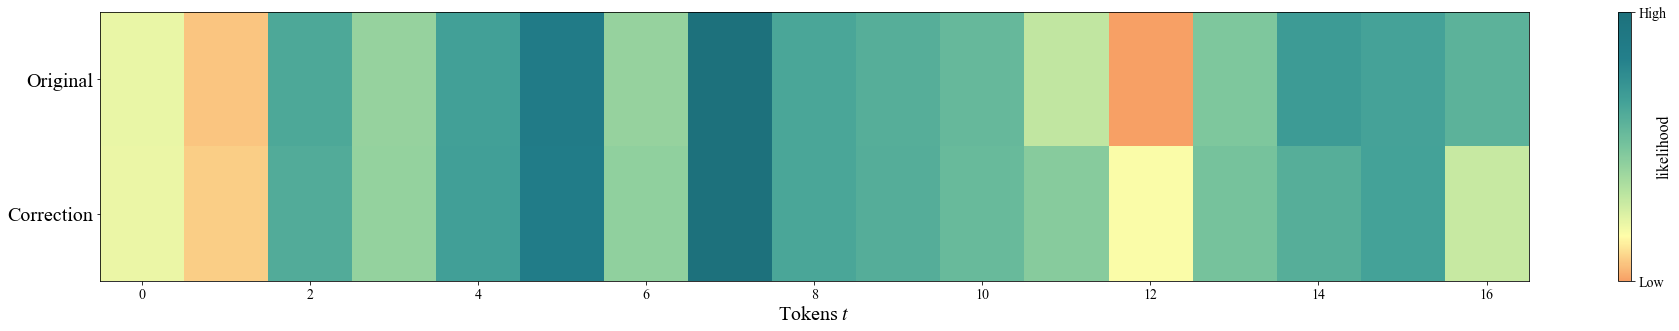

In [ ]:
# 将列表 y 转换为 NumPy 数组
y_array = np.array(y)

# 创建热力图
fig, ax = plt.subplots(figsize=(32, 8*0.618))
cax = ax.imshow(
    y,
    aspect='auto',
    cmap=newcmp
)
# 添加颜色条
cbar = fig.colorbar(cax)

vmin, vmax = y_array.min(), y_array.max()
cbar.set_ticks([vmin, vmax])
cbar.set_ticklabels(['Low', 'High'])  # 设置刻度标签
cbar.ax.tick_params(labelsize=14)  # 设置刻度标签的字体大小
cbar.set_label("likelihood", labelpad=-10, size=18, fontsize=16)
cbar.ax.set_position([0.8, 0.18, 0.02, 0.7])

# 显示热力图每个值
# for i in range(y_array.shape[0]):
#     tokens = text_lst_ori if i == 0 else text_lst_cor
#     for j in range(y_array.shape[1]):
#         ax.text(j, i, tokens[j], ha="center", va="center", color="black", fontsize=20)

# 设置坐标轴标签
ax.set_xlabel(r'Tokens $t$', fontsize=20)

# 设置 y 轴刻度和标签
row_labels = ['Original', 'Correction']
ax.set_yticks(range(len(row_labels)))
ax.set_yticklabels(row_labels, fontsize=20)

plt.savefig('./plot_1/'+sheet_name+'_b_300dpi.jpg', bbox_inches='tight', dpi=300)
plt.show()